In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#### Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [20]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


#### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [22]:
df = df[(df.value < df.value.quantile(.975)) & (df.value > df.value.quantile(.025))]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1176 entries, 2016-06-17 to 2019-11-17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1176 non-null   int64
dtypes: int64(1)
memory usage: 18.4 KB


### Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
#### The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. 
#### The label on the x axis should be Date and the label on the y axis should be Page Views.

<Axes: title={'center': 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

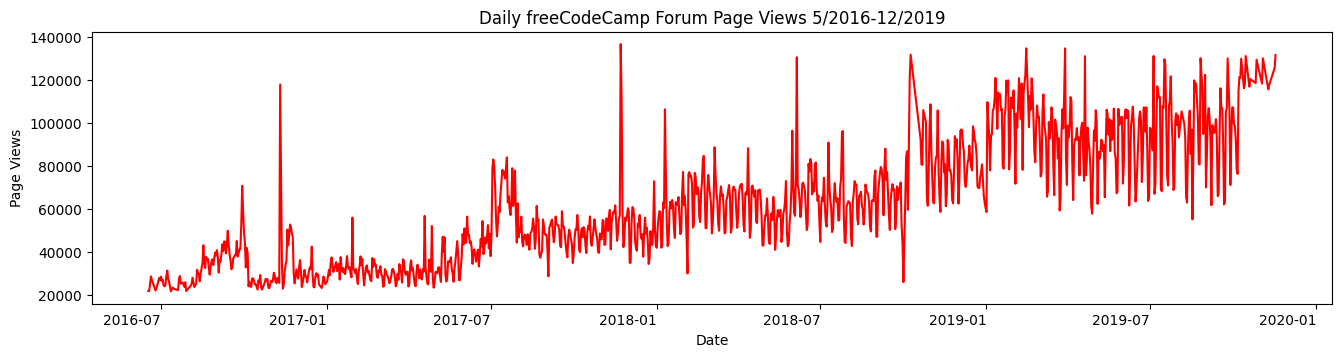

In [28]:
def draw_line_plot():
    # Draw line plot
    fig = df.plot.line(figsize=(16, 4), color='red', legend=False)
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.xticks(rotation=0)

    # Save image and return fig (don't change this part)
    #fig.savefig('line_plot.png')
    return fig

draw_line_plot()

### Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
#### It should show average daily page views for each month grouped by year. 
#### The legend should show month labels and have a title of Months. 
#### On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [42]:
df_bar = df.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month_name()
df_bar

,value,year,month
date,,,
2016-06-17,21691,2016,June
2016-06-18,21681,2016,June
2016-06-20,28508,2016,June
2016-06-21,26805,2016,June
2016-06-25,21923,2016,June
...,...,...,...
2019-11-03,130118,2019,November
2019-11-09,115642,2019,November
2019-11-10,117717,2019,November


In [53]:
df_bar_group = df_bar.groupby(['year', 'month'])['value'].mean()
#df_bar_group = df_bar_group[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]
df_bar_group

year  month    
2016  August        32154.750000
      December      28690.928571
      July          25460.761905
      June          24666.777778
      November      36354.241379
      October       28168.250000
      September     41476.866667
2017  April         30878.733333
      August        47712.451613
      December      48420.580645
      February      31113.071429
      January       32785.161290
      July          65806.838710
      June          43577.500000
      March         29369.096774
      May           34244.290323
      November      57701.566667
      October       47438.709677
      September     47376.800000
2018  April         62350.833333
      August        62831.612903
      December      80047.483871
      February      65679.000000
      January       58580.096774
      July          63591.064516
      June          70117.000000
      March         62693.774194
      May           56562.870968
      November      78688.333333
      October       84908.7

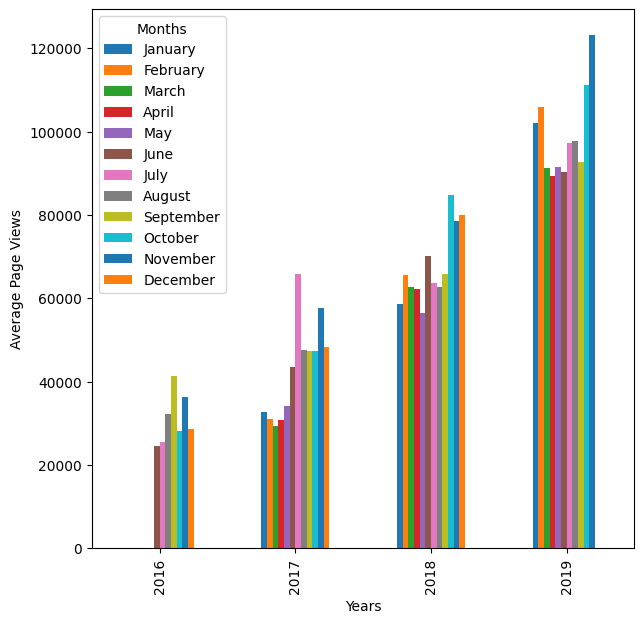

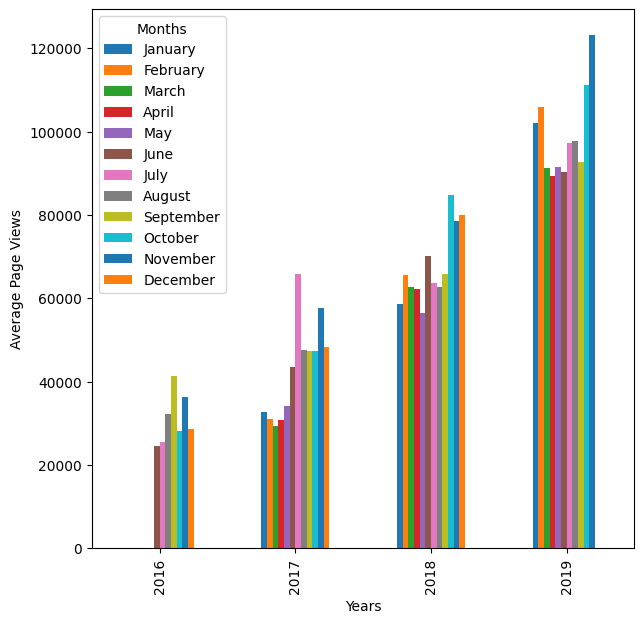

In [57]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()
    df_bar_group = df_bar.groupby(['year', 'month'])['value'].mean()
    df_bar_group = df_bar_group.unstack(level='month')
    df_bar_group = df_bar_group[['January', 'February', 'March', 'April', 'May',
                                'June', 'July', 'August', 'September', 'October', 'November', 'December']]
    
    # Draw bar plot
    fig = df_bar_group.plot.bar(figsize=(7,7)).figure
    plt.xlabel('Years');
    plt.ylabel('Average Page Views');
    plt.legend(title='Months');

    # Save image and return fig (don't change this part)
    # fig.savefig('bar_plot.png')
    return fig

draw_bar_plot()

### Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png".
#### These box plots should show how the values are distributed within a given year or month and how it compares over time. 
#### The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). #### Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. 
The boilerplate includes commands to prepare the data.

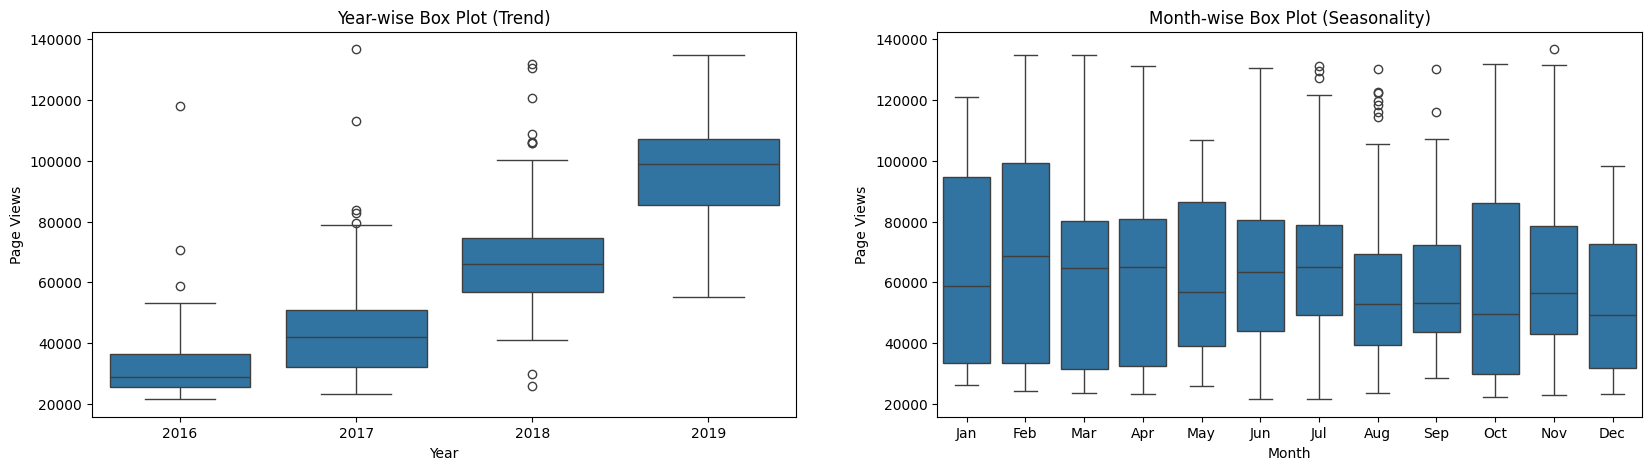

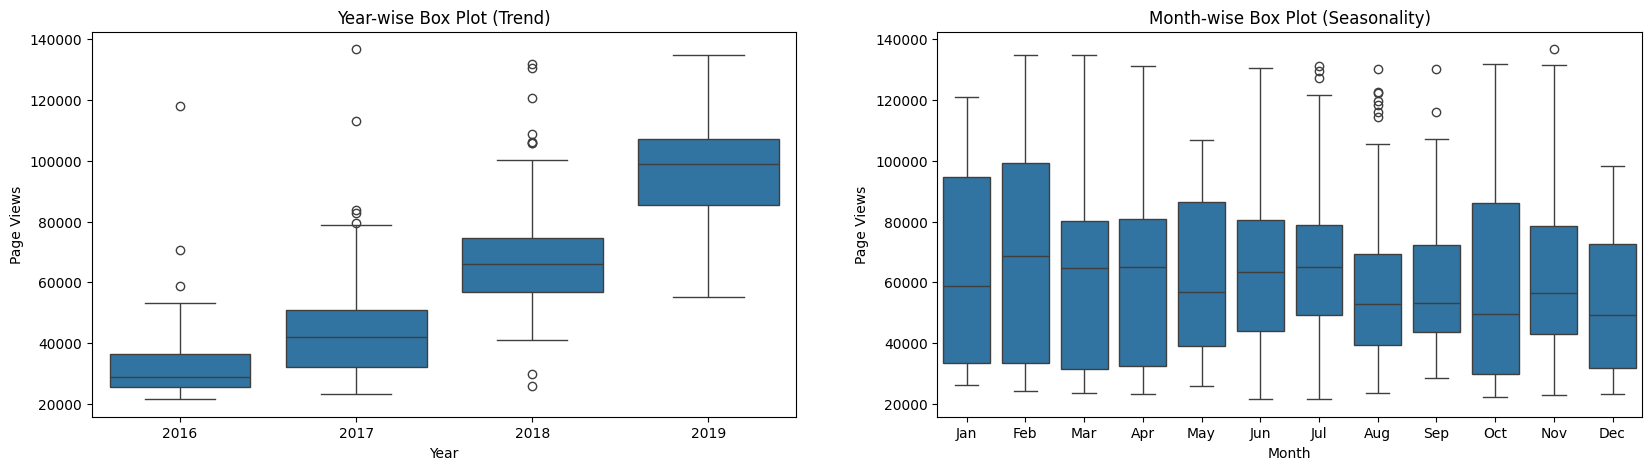

In [58]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    mon_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    ax1 = sns.boxplot(data=df_box, x='year', y='value', ax=ax1)
    ax2 = sns.boxplot(data=df_box, x='month', y='value', ax=ax2, order=mon_order);
    ax1.set_ylabel('Page Views')
    ax1.set_xlabel('Year')
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax2.set_ylabel('Page Views')
    ax2.set_xlabel('Month')
    ax2.set_title('Month-wise Box Plot (Seasonality)')


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

draw_box_plot()